## Statistical Learning Theory - Group 356

### Luke Longren & Angela Mitrovska

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (10,8)

## Exercise H8.2: Variability of classification

### Generate a sample

In [4]:
def data(p):
    #define covariance
    cov = np.dot(2,np.identity(2))
    #define the means 
    mu1 = [0,1]
    mu2 = [1,0]
    #calculate the distributions
    #math.ceil is used here to round up, and avoid error
    #later for the case when p is odd
    cluster1 = np.random.multivariate_normal(mu1,cov,math.ceil(p/2))
    cluster2 = np.random.multivariate_normal(mu2,cov,math.ceil(p/2))
    #add the y values
    cluster1 = np.c_[cluster1,np.ones(math.ceil(p/2))]
    cluster2 = np.c_[cluster2,-np.ones(math.ceil(p/2))]
    return cluster1,cluster2

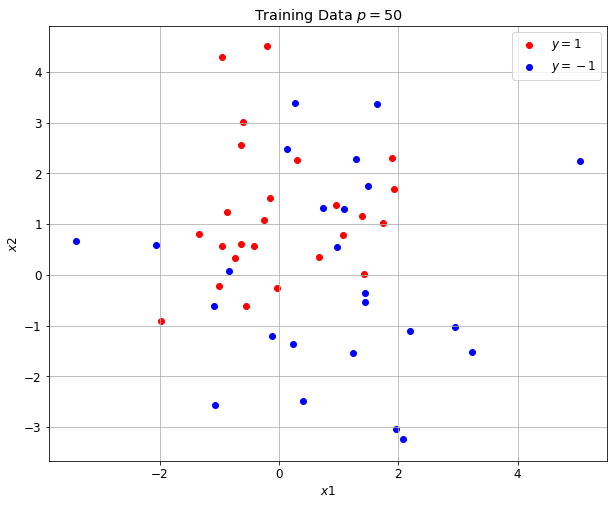

In [5]:
p = 50
plt.scatter(data(p)[0][:,0],data(p)[0][:,1],c='r',label='$y=1$')
plt.scatter(data(p)[1][:,0],data(p)[1][:,1],c='b',label='$y=-1$')
plt.title('Training Data $p=50$')
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.legend()
plt.grid()
plt.show()

### Find the weights

In [6]:
def weights(x,y):
    #calculate the weights: 
    # w == (x*x.T)*x*yT #
    inverse = np.linalg.inv(np.matmul(x,x.T))
    w = np.matmul(np.matmul(inverse,x),y)
    return w

In [7]:
p = 50 #combine the sets into one to then evaluate
training_data = np.append(data(p)[0],data(p)[1],axis=0)
x_train = np.array([training_data[:,0],training_data[:,1]])
y_train = np.array(training_data[:,2])
w = weights(x_train,y_train)
print('weights:',w)

weights: [-0.14010555  0.16611471]


### Find the predictions

In [8]:
p_test = 1000
test_data = np.append(data(p_test)[0],data(p_test)[1],axis=0)
x_test = np.array([test_data[:,0],test_data[:,1]])
y_test = np.array(test_data[:,2])

In [9]:
def sign_function(x,w,p,w0):
    #predictions for this classifier
    output = np.zeros(p)
    for i in range(p):
        arg = w0 + (w[0] * x[0][i] + w[1] * x[1][i])
        if arg < 0:
            output[i] = -1
        else:
            output[i] = 1
    return output

### Calculate the accuracies

In [10]:
def accuracy(prediction,true):
    correct = np.zeros(len(prediction))
    for i in range(len(prediction)):
        if prediction[i] == true[i]:
            correct[i] = 1
        else:
            correct[i] = 0
    percentage = np.sum(correct) / len(correct)
    return percentage

In [11]:
w0 = 0
r_train = accuracy(sign_function(x_train,w,p,w0),y_train)
r_test = accuracy(sign_function(x_test,w,p_test,w0),y_test)
print('r training:', r_train)
print('r test:', r_test)

r training: 0.64
r test: 0.718


### Repeat these steps 50 times for each $p$

In [12]:
def repetition(number,p,p_test):
    r_train = np.zeros(number) #empty training percentage
    r_test = np.zeros(number) #empty testing percentage
    w = np.zeros((number,2))
    for i in range(number):
        #training data and weights
        training_data = np.append(data(p)[0],data(p)[1],axis=0)
        x_train = np.array([training_data[:,0],training_data[:,1]])
        y_train = np.array(training_data[:,2])
        w[i] = weights(x_train,y_train)
        #testing data
        p_test = 1000
        test_data = np.append(data(p_test)[0],data(p_test)[1],axis=0)
        x_test = np.array([test_data[:,0],test_data[:,1]])
        y_test = np.array(test_data[:,2])
        #percentages
        r_train[i] = accuracy(sign_function(x_train,w[i],p,w0),y_train)
        r_test[i] = accuracy(sign_function(x_test,w[i],p_test,w0),y_test)
    return r_train,r_test,w

In [13]:
p_values = [3,4,6,8,10,20,40,100]
#calculate the mean and standard deviation for p and w
r_train_avg = np.zeros(len(p_values))
r_train_std = np.zeros(len(p_values))
r_test_avg = np.zeros(len(p_values))
r_test_std = np.zeros(len(p_values))
w_avg = np.zeros((len(p_values),2))
w_std = np.zeros((len(p_values),2))
for i in range(len(p_values)):
    rep = repetition(number=50,p=p_values[i],p_test=1000)
    r_train_avg[i] = np.sum(rep[0])
    r_test_avg[i] = np.sum(rep[1])
    r_train_std[i] = np.std(rep[0])
    r_test_std[i] = np.std(rep[1])
    w_avg[i] = np.sum(rep[2],axis=0)
    w_std[i] = np.std(rep[2],axis=0)

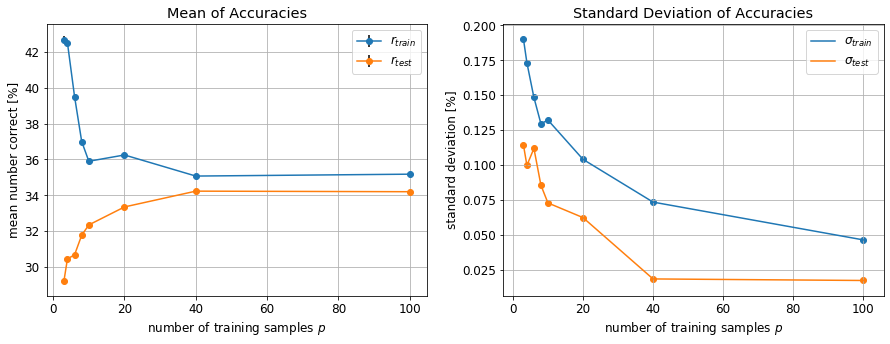

In [14]:
_, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].errorbar(p_values,r_train_avg,r_train_std,label='$r_{train}$',c='C0',ecolor='k',fmt='-o')
ax[0].errorbar(p_values,r_test_avg,r_test_std,label='$r_{test}$',c='C1',ecolor='k',fmt='-o')
ax[0].set_title('Mean of Accuracies')
ax[0].set_ylabel('mean number correct [%]')
ax[0].set_xlabel('number of training samples $p$')
ax[0].legend()
ax[0].grid()

ax[1].plot(p_values,r_train_std,label=r'$\sigma_{train}$')
ax[1].scatter(p_values,r_train_std)
ax[1].plot(p_values,r_test_std,label=r'$\sigma_{test}$')
ax[1].scatter(p_values,r_test_std)
ax[1].set_title('Standard Deviation of Accuracies')
ax[1].set_ylabel('standard deviation [%]')
ax[1].set_xlabel('number of training samples $p$')
ax[1].legend()
ax[1].grid()

plt.show()

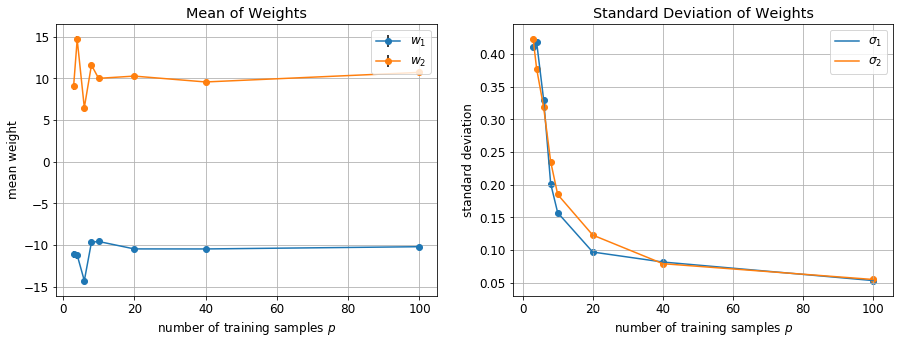

In [15]:
_, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].errorbar(p_values,w_avg[:,0],yerr=w_std[:,0],label='$w_1$',c='C0',ecolor='k',fmt='-o')
ax[0].errorbar(p_values,w_avg[:,1],yerr=w_std[:,1],label='$w_2$',c='C1',ecolor='k',fmt='-o')
ax[0].set_title('Mean of Weights')
ax[0].set_ylabel('mean weight')
ax[0].set_xlabel('number of training samples $p$')
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].plot(p_values,w_std[:,0],label=r'$\sigma_1$')
ax[1].scatter(p_values,w_std[:,0])
ax[1].plot(p_values,w_std[:,1],label=r'$\sigma_2$')
ax[1].scatter(p_values,w_std[:,1])
ax[1].set_title('Standard Deviation of Weights')
ax[1].set_ylabel('standard deviation')
ax[1].set_xlabel('number of training samples $p$')
ax[1].legend(loc='upper right')
ax[1].grid()

plt.show()

As the value of $p$ increases, the mean of accuracies $r$ for the test and training set approaches the same value. 

Was confused by the implementation of the bias weight $w_0$. My understanding of it was that the weight is constant here and thus not changing from the value of 1, but this method did not improve the accuracy of the classifier. Something here that I am going about implementing is incorrect, but I don't understand exactly what.

## Exercise H8.3: The Binomial distribution

### a) Visualize the binomial distribution

## $f(k;n,p) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$

In [16]:
def binomial(k,n,p):
    a = math.factorial(n) / (math.factorial(k) * math.factorial(n-k))
    b = p ** k
    c = (1-p) ** (n-k)
    return a*b*c

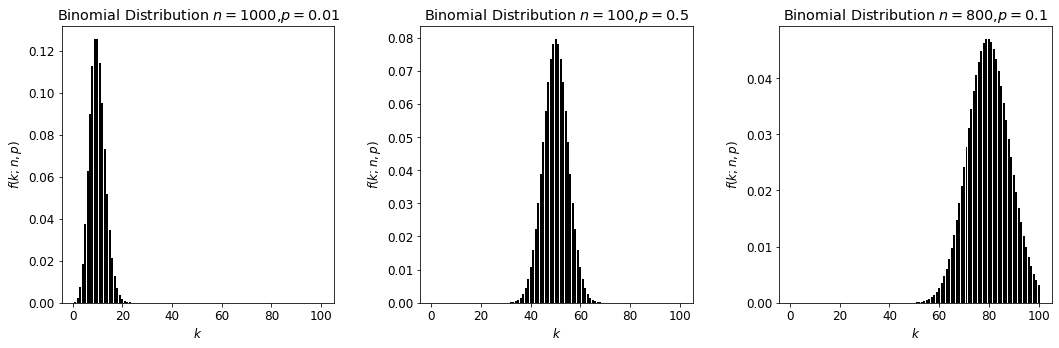

In [17]:
k = np.linspace(1,100,100) 
_, ax = plt.subplots(1,3,figsize=(15,5))

[ax[0].bar(i,binomial(i,n=1000,p=0.01),color='k') for i in k]
ax[0].set_title('Binomial Distribution $n=1000$,$p=0.01$')
ax[0].set_ylabel('$f(k;n,p)$')
ax[0].set_xlabel('$k$')

[ax[1].bar(i,binomial(i,n=100,p=0.5),color='k') for i in k]
ax[1].set_title('Binomial Distribution $n=100$,$p=0.5$')
ax[1].set_ylabel('$f(k;n,p)$')
ax[1].set_xlabel('$k$')

[ax[2].bar(i,binomial(i,n=800,p=0.1),color='k') for i in k]
ax[2].set_title('Binomial Distribution $n=800$,$p=0.1$')
ax[2].set_ylabel('$f(k;n,p)$')
ax[2].set_xlabel('$k$')

plt.tight_layout()
plt.show()

### b) Visualize the normal distribution

## $f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

In [18]:
def normal(x,mu,sig):
    a = 1 / (sig * np.sqrt(2*math.pi))
    b = np.exp(-((x-mu)**2) / (2*sig**2))
    return a*b

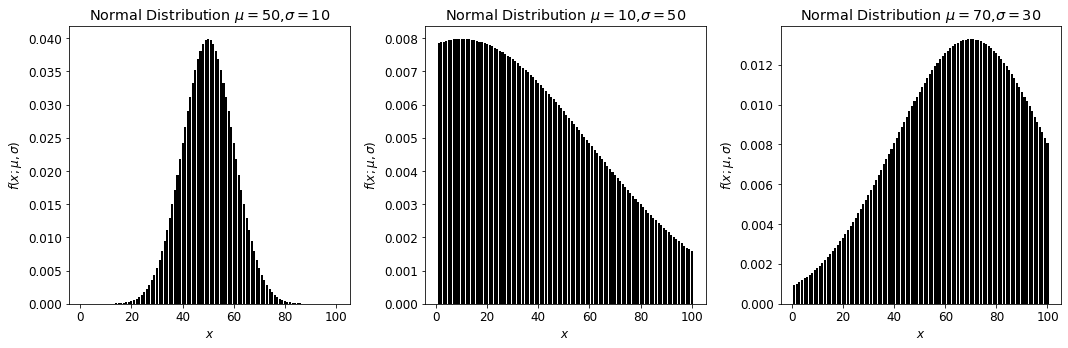

In [19]:
x = np.linspace(1,100,100)
_, ax = plt.subplots(1,3,figsize=(15,5))

[ax[0].bar(i,normal(i,mu=50,sig=10),color='k') for i in k]
ax[0].set_title('Normal Distribution $\mu=50$,$\sigma=10$')
ax[0].set_ylabel(r'$f(x;\mu,\sigma)$')
ax[0].set_xlabel('$x$')

[ax[1].bar(i,normal(i,mu=10,sig=50),color='k') for i in k]
ax[1].set_title('Normal Distribution $\mu=10$,$\sigma=50$')
ax[1].set_ylabel(r'$f(x;\mu,\sigma)$')
ax[1].set_xlabel('$x$')

[ax[2].bar(i,normal(i,mu=70,sig=30),color='k') for i in k]
ax[2].set_title('Normal Distribution $\mu=70$,$\sigma=30$')
ax[2].set_ylabel(r'$f(x;\mu,\sigma)$')
ax[2].set_xlabel('$x$')

plt.tight_layout()
plt.show()

Shown on the left is an example of the distribtion with reasonable conditions, where the mean is a value less than the standard deviation. In the center is an example of the distribution with problematic conditions, where the mean is centered weirdly and the deviation is quite high.

Some unique things regarding the normal distribution are that it is the only distribution where the mean and variance calculated from a set of independent draws are then independent of each other. Also, the value of the normal distribution is close to zero when the value $x$ is more than a few standard deviations away from the mean. Therefore, it may not be a good distribution for when one is expecting a large fraction of outliers.

### c) Visualize the poisson distribution

## $f(k;\lambda) = \frac{\lambda^k}{k!} e^{-\lambda}$

In [20]:
def poisson(k,lam):
    a = (lam**k) / math.factorial(k)
    b = np.exp(-lam)
    return a*b

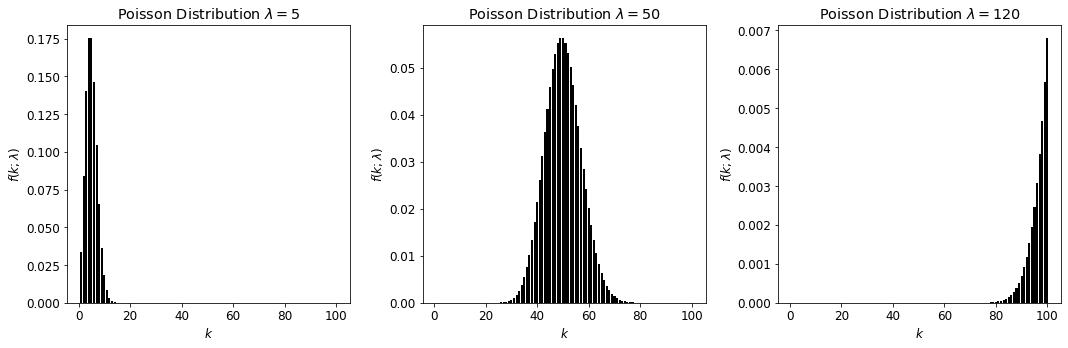

In [21]:
k = np.linspace(1,100,100) 
_, ax = plt.subplots(1,3,figsize=(15,5))

[ax[0].bar(i,poisson(i,lam=5),color='k') for i in k]
ax[0].set_title('Poisson Distribution $\lambda=5$')
ax[0].set_ylabel(r'$f(k;\lambda)$')
ax[0].set_xlabel('$k$')

[ax[1].bar(i,poisson(i,lam=50),color='k') for i in k]
ax[1].set_title('Poisson Distribution $\lambda=50$')
ax[1].set_ylabel(r'$f(k;\lambda)$')
ax[1].set_xlabel('$k$')

[ax[2].bar(i,poisson(i,lam=120),color='k') for i in k]
ax[2].set_title('Poisson Distribution $\lambda=120$')
ax[2].set_ylabel(r'$f(k;\lambda)$')
ax[2].set_xlabel('$k$')

plt.tight_layout()
plt.show()

The poisson distribution is an alternative approximation to the binomial distribution for modeling the number of times an event occurs in an interval of time or space. The model is a good approximation for $\lambda$ values that are adequately large enough but not overly large. An example of a good parametrization would be the center one of the above examples.